# Importing the necessary libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Get the data and divide the dataset


In [ ]:
(x_train,y_train), (x_test,y_test)= keras.datasets.mnist.load_data()

#assertion on the shape of the datasets
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Display a sample from the x_train

Label:>  8


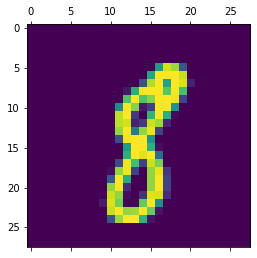

In [17]:
SAMPLE= x_train[300] #picking a sample from the train set
plt.matshow(SAMPLE)
print("Label:> ",y_train[300])

# Flattening the dataset(ANN)

In [69]:
x_train_flatten= x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test_flatten= x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

print(x_train_flatten.shape)
print(x_test_flatten.shape)

#converting to float32 precision
x_train_flatten = x_train_flatten.astype('float32')
x_test_flatten = x_test_flatten.astype('float32')

#Normalize the data
x_train_flatten /= 255
x_test_flatten /= 255

# #one hot encoding of the labels
# y_train_one_hot = keras.utils.to_categorical(y_train,10)
# y_test_one_hot = keras.utils.to_categorical(y_test,10)


(60000, 784)
(10000, 784)


# Defining the Neural network

In [90]:
LAYERS_SIZE= x_train_flatten.shape[1] #784
CLASSES= 10 #no of classes are from 0-9
model= keras.Sequential([
                         keras.layers.Dense(input_shape=(LAYERS_SIZE,),units=LAYERS_SIZE/2,activation="relu"), #392
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(units=LAYERS_SIZE/4, activation="relu"), #196
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(units=LAYERS_SIZE/8, activation="relu"), #98
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(units=LAYERS_SIZE/16, activation="relu"), #49
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(units=10, activation="softmax") #10
])

In [91]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [92]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 392)               307720    
_________________________________________________________________
dropout_1 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 196)               77028     
_________________________________________________________________
dropout_2 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 98)                19306     
_________________________________________________________________
dropout_3 (Dropout)          (None, 98)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 49)              

# Training the model

In [93]:
training= model.fit(x_train_flatten, y_train,epochs=50, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test_flatten, y_test)
print('Test accuracy:> ', test_acc)

Epoch 1/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3657 - accuracy: 0.8929 - val_loss: 0.1317 - val_accuracy: 0.9616
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1650 - accuracy: 0.9550 - val_loss: 0.1152 - val_accuracy: 0.9667
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1257 - accuracy: 0.9658 - val_loss: 0.0977 - val_accuracy: 0.9737
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1093 - accuracy: 0.9699 - val_loss: 0.1040 - val_accuracy: 0.9711
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0895 - accuracy: 0.9753 - val_loss: 0.1090 - val_accuracy: 0.9708
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0811 - accuracy: 0.9778 - val_loss: 0.1074 - val_accuracy: 0.9749
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0701 - accuracy: 0.9798 - val_loss: 0.0957 - val_accuracy:

# Visualize the accuracy metrics

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


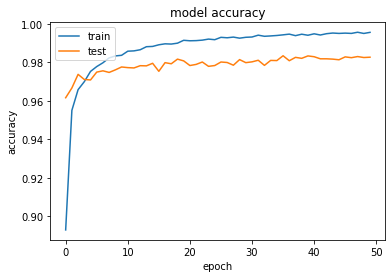

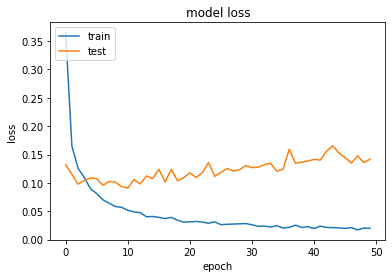

In [94]:
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summary

I have divided the project into 7 parts as defined above.
I downloaded the Mnist dataset and divided into train and test set and flattened the datasets.
After which I have converted the dataset to "float32" precision and normalized the dataset.

Model design:
My model design is logical decreasing in no of layers in multiples of 2.
The layers goes from **392-->196-->98-->49-->10**.
In between these layers, dropout of 0.2 is added to reduce the overfitting.

Training model:
For training the model Adam optimizer with learning rate of 0.001 is used for weight updates.

The model was then trained for 50 epochs with a validation set of 20% for tracking accuracy on the validation set.

**Finally after 50 epochs I was able to achive accuracy of 98.25% on the test set.**

